In [3]:
import torch
print(torch.version.cuda)  # 빌드된 CUDA 버전 확인
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

12.4
True
NVIDIA GeForce RTX 4090


# Optimizer Algorithms Overview

## 이론 (Theory)

## 1. Stochastic Gradient Descent (SGD)

* **정의**: 전체 데이터가 아닌 무작위 배치(batch)로 계산한 기울기로 파라미터를 업데이트하는 방식입니다 ([Wikipedia][1]).
* **수식**:

  $$
    \theta_{t+1} = \theta_t - \eta \,\nabla_\theta L(\theta_t)
  $$

  여기서 $\eta$는 학습률, $\nabla_\theta L$은 미니배치 기반 기울기입니다 ([Wikipedia][1]).
* **특징**:

  * 계산 효율이 높고 메모리 사용량이 적습니다.
  * 그러나 학습률이 고정된 상태로 남으면 진동하거나 느리게 수렴할 수 있습니다 ([Analytics Vidhya][5]).



## 2. Momentum & Nesterov Accelerated Gradient

### 2.1 Momentum

* **개념**: 과거 기울기의 지수이동평균을 사용해 “관성”을 도입, 최적화 경로의 진동을 줄이고 더 빠른 수렴을 유도합니다 ([optimization.cbe.cornell.edu][2]).
* **수식**:

  $$
    v_t = \mu\,v_{t-1} + \eta \,\nabla_\theta L(\theta_t),\quad
    \theta_{t+1} = \theta_t - v_t
  $$

  여기서 $\mu$는 관성 계수(momentum factor)로, 보통 0.9를 사용합니다 ([Wikipedia, la enciclopedia libre][3]).

### 2.2 Nesterov Accelerated Gradient (NAG)

* **개념**: “미리 앞으로” 예상 위치에서 기울기를 계산하여 더욱 안정적이고 빠른 수렴을 이룹니다 ([Wikipedia, la enciclopedia libre][3]).
* **수식**:

  $$
    v_t = \mu\,v_{t-1} + \eta\,\nabla_\theta L\bigl(\theta_t - \mu\,v_{t-1}\bigr),\quad
    \theta_{t+1} = \theta_t - v_t
  $$



## 3. AdaGrad

* **개념**: 파라미터별로 **과거 기울기 제곱합**을 추적해, 자주 업데이트된 파라미터는 학습률을 줄이고 드물게 업데이트된 파라미터는 학습률을 높입니다 ([Wikipedia][1]).
* **수식**:

  $$
    r_t = r_{t-1} + (\nabla_\theta L(\theta_t))^2,\quad
    \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{r_t + \epsilon}}\,\nabla_\theta L(\theta_t)
  $$
* **특징**:

  * 희소 데이터(sparse data)에 유리하며, 각 파라미터가 받은 업데이트 빈도에 따라 자동으로 학습률이 조정됩니다.
  * 그러나 긴 학습에서는 학습률이 너무 작아질 수 있습니다.


## 3 Adaptive Learning Rate Methods

AdaGrad
원리: 과거 기울기의 제곱합을 학습률에 반영해, 자주 업데이트된 파라미터는 학습률을 줄이고 드물게 업데이트된 파라미터는 높입니다

업데이트 식:

𝑟𝑡=𝑟𝑡−1+(∇𝜃𝐿(𝜃𝑡))**2
,
𝜃𝑡+1=𝜃𝑡−𝜂/root(𝑟𝑡+𝜖)∇𝜃𝐿(𝜃𝑡)


## 4. RMSprop

* **개념**: AdaGrad의 학습률 급감 문제를 완화하기 위해 **지수이동평균(EMA)** 으로 과거 기울기 제곱을 계산합니다 ([Wikipedia][1]).
* **수식**:

  $$
    r_t = \beta\,r_{t-1} + (1-\beta)\,(\nabla_\theta L(\theta_t))^2,\quad
    \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{r_t + \epsilon}}\,\nabla_\theta L(\theta_t)
  $$
* **특징**:

  * 학습률이 지나치게 작아지지 않으면서, AdaGrad보다 안정적입니다.


## 5. Adam (Adaptive Moment Estimation)

* **개념**: Momentum(1차 모멘트)과 RMSprop(2차 모멘트)의 장점을 결합하고, 편향 보정까지 수행하는 현대적 최강 옵티마이저입니다 ([optimization.cbe.cornell.edu][4]).
* **수식**:

  $$
  \begin{aligned}
    m_t &= \beta_1 m_{t-1} + (1-\beta_1)\,\nabla_\theta L(\theta_t),\\
    v_t &= \beta_2 v_{t-1} + (1-\beta_2)\,(\nabla_\theta L(\theta_t))^2,\\
    \hat m_t &= \tfrac{m_t}{1-\beta_1^t},\quad
    \hat v_t = \tfrac{v_t}{1-\beta_2^t},\\
    \theta_{t+1} &= \theta_t - \eta\,\tfrac{\hat m_t}{\sqrt{\hat v_t} + \epsilon}.
  \end{aligned}
  $$

  일반적으로 $\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}$ 을 사용합니다.


 r Comparison on MNIST"); plt.legend()
plt.show()
```

* **실습 목표**:

  * 각 옵티마이저가 초기 10 에폭 동안 어떻게 수렴하는지 시각적으로 비교합니다.
  * 수렴 속도, 진동, 최종 손실 수준 등을 관찰해 보세요.

---

다음 수업(2일차)에서는 **Learning Rate Scheduling**을 배워, 고정 학습률의 한계를 극복하고 더욱 정교한 학습 제어 방법을 실습합니다.

[1]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent?utm_source=chatgpt.com "Stochastic gradient descent"
[2]: https://optimization.cbe.cornell.edu/index.php?title=Momentum&utm_source=chatgpt.com "Momentum - Optimization Wiki"
[3]: https://es.wikipedia.org/wiki/Descenso_de_gradiente_estoc%C3%A1stico?utm_source=chatgpt.com "Descenso de gradiente estocástico"
[4]: https://optimization.cbe.cornell.edu/index.php?title=Adam&utm_source=chatgpt.com "Adam - Optimization Wiki"
[5]: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/?utm_source=chatgpt.com "Optimizers in Deep Learning: A Detailed Guide - Analytics Vidhya"


# 실전 실습 (Practice)

In [14]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [16]:
train_data=datasets.MNIST(root="/data", train=True, download=True, transform=transforms.ToTensor())
loader=DataLoader(train_data, batch_size=128, shuffle=True)

model=nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128, 10)
)


In [20]:
criter=nn.CrossEntropyLoss()
lr=0.001
optimy={
    'SGD':optim.SGD(model.parameters(),lr=lr),
    'Momentum':optim.SGD(model.parameters(), lr=lr, momentum=0.9),
    'Nesterov':optim.SGD(model.parameters(),lr=lr,momentum=0.9,nesterov=True),
    'Adagrad':optim.Adagrad(model.parameters(),lr=lr),
    'RMSprop':optim.RMSprop(model.parameters(),lr=lr),
    'Adam':optim.Adam(model.parameters(),lr=lr)
}

In [26]:
import matplotlib.pyplot as plt

num_epoch=10
loss_hit={name:[]for name in optimy}
for name,opt in optimy.items():
    for epoch in range(num_epoch):
        model.train()
        total_loss, count=0.0,0
        for data, target in loader:
            opt.zero_grad()
            logit=model(data)
            loss=criter(logit, target)
            loss.backward()
            opt.step()
            total_loss+=loss.item()*data.size(0)
            count+=data.size(0)
        loss_hit[name].append(total_loss/count)
        print(f"{epoch}, {total_loss}, {total_loss/count}")

0, 77494.98405838013, 1.2915830676396687
1, 70056.50188446045, 1.1676083647410074
2, 63741.190242767334, 1.062353170712789
3, 58471.614419937134, 0.9745269069989523
4, 54098.59889793396, 0.901643314965566
5, 50461.65958595276, 0.8410276597658793
6, 47412.906042099, 0.79021510070165
7, 44835.14121246338, 0.7472523535410563
8, 42639.129163742065, 0.7106521527290344
9, 40745.46026802063, 0.6790910044670105
0, 34375.81809425354, 0.5729303015708923
1, 27972.116886138916, 0.46620194810231524
2, 24909.680170059204, 0.4151613361676534
3, 23071.6299161911, 0.3845271652698517
4, 21824.13751411438, 0.36373562523523967
5, 20889.56987953186, 0.3481594979921977
6, 20144.83368587494, 0.33574722809791563
7, 19531.420342445374, 0.3255236723740896
8, 18987.04006099701, 0.3164506676832835
9, 18504.383263111115, 0.3084063877185186
0, 18084.12968635559, 0.30140216143925985
1, 17678.345594882965, 0.29463909324804943
2, 17298.064096450806, 0.2883010682741801
3, 16941.04311275482, 0.2823507185459137
4, 16596.

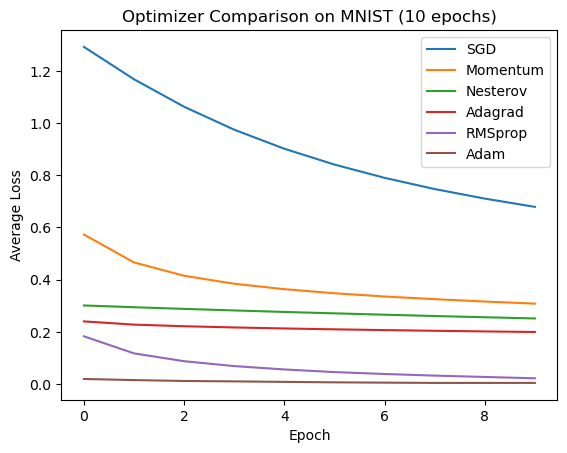

In [29]:
for name, hit in loss_hit.items():
    plt.plot(hit,label=name)

plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Optimizer Comparison on MNIST (10 epochs)")
plt.legend()
plt.show()

## 요약

Adam 옵티마이저가 특히 안정적이라고 느껴지신 이유는, 모멘텀과 RMSprop의 장점을 결합하여 파라미터별 학습률을 적응적으로 조정하고, 편향 보정(bias correction)을 통해 **수치적 안정성(numerical stability)**을 확보하기 때문입니다. 기본 하이퍼파라미터 설정만으로도 폭넓은 작업에 잘 동작하며, SGD 대비 더 빠른 초기 수렴과 덜 예민한 튜닝 특성을 보여 줍니다.

12초 동안 생각함


Adam 옵티마이저는 빠르고 안정적인 수렴 특성으로 널리 쓰이지만, 아래와 같은 **여러 문제점**이 보고되어 있습니다.

Adam의 주요 단점은

* **일부 단순/볼록(convex) 문제에서 불수렴**하거나 수렴이 보장되지 않음 ([arXiv][1])
* **일반화 성능 저하**, SGD 대비 테스트 성능이 떨어지는 사례 다수 ([Analytics Vidhya][2])
* **학습률 편향·과도한 스텝 크기**로 인한 불안정성
* **편향 보정 후에도 초기 단계 과도한 업데이트** 가능성
* **초기 학습률 설계 어려움**과 하이퍼파라미터 민감도 ([Towards AI][3])

아래에서 각 문제를 자세히 살펴보겠습니다.

---

## 1. 불수렴 및 수렴 보장 문제

### 1.1 단순 convex 문제에서 불수렴

* Reddi 등은 “AMSGrad” 논문에서, **exponential moving average** 방식이 일부 convex 최적화 과제에서 최적해에 수렴하지 못한다고 지적했습니다 ([arXiv][1]).

### 1.2 특정 데이터 분포에서 다른 해로 수렴

* 과적합된 2-layer CNN 실험에서 Adam은 나쁜 해(bad minimum)에, GD/SGD는 좋은 해로 수렴하는 경향이 관찰되었습니다 .
* 간단한 학습 문제를 구성해 보면, GD가 더 나은 일반화 성능을 보이는 반면 Adam은 그렇지 않은 사례가 많습니다 .

---

## 2. 일반화 성능 저하

* **CIFAR-10** 같은 이미지 분류 과제에서, Adam이 빠르게 학습하지만 최종 테스트 정확도는 SGD with momentum보다 낮게 나오는 경우가 많습니다 ([Analytics Vidhya][2]).
* Adaptive optimizer들이 **비균일(non-uniform) 스케일링**을 수행함에 따라, 훈련 손실은 작아져도 검증 손실이 올라가는 경향이 나타납니다 ([Towards AI][3]).

---

## 3. 학습률 편향 및 과도한 스텝 크기

* Adam의 **모멘텀(1차 모멘트)과 분산(2차 모멘트)** 추정치 사이 불일치로 인해, 때로는 **극단적(step size)** 업데이트가 발생합니다 .
* EMA 기반 이동 평균은 최근 기울기에 과도하게 반응해, 학습 초기 단계에서 스텝 크기가 지나치게 커질 수 있습니다 .

---

## 4. 하이퍼파라미터 민감도

* Adam은 기본값($\beta_1=0.9,\beta_2=0.999,\epsilon=10^{-8}$)이 널리 쓰이나, \*\*학습률(lr)\*\*과 모멘텀 계수 $\beta$에 민감하게 반응합니다. 잘못 설정하면 발산하거나, 수렴 속도가 급격히 느려질 수 있습니다 ([Towards AI][3]).
* 특히 **학습률 감소(LR decay)** 스케줄이 내장되어 있지 않아, 따로 스케줄러를 설계해야 하는 번거로움이 있습니다 ([Stack Overflow][4]).

---

## 5. 대응 기법 및 대안

1. **AMSGrad**: EMA 불안정 문제를 개선, 수렴을 보장하는 변형 옵티마이저 ([arXiv][1]).
2. **AdamW**: Weight decay를 분리해 일반화 성능 개선 ([OpenReview][5]).
3. **RAdam, QHAdam** 등: 학습 초기 안정성을 높이기 위한 모멘텀 보정 기법.
4. **하이브리드 전략**: “초기 𝑁 에폭은 Adam → 이후 SGD” 방식으로 성능과 일반화 균형 맞추기 .

---

이처럼 Adam은 **빠른 수렴**과 **사용 편의성**에도 불구하고, **수렴 보장 문제**, **일반화 저하**, **과도한 업데이트**, **하이퍼파라미터 민감도** 등의 약점을 지니고 있습니다. 이러한 단점을 감안해, 실제 프로젝트에서는 **AMSGrad**나 **AdamW** 같은 변형 기법과 **적절한 스케줄러**를 함께 사용하는 것이 좋습니다.

[1]: https://arxiv.org/abs/1904.09237?utm_source=chatgpt.com "[1904.09237] On the Convergence of Adam and Beyond - arXiv"
[2]: https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/?utm_source=chatgpt.com "What is Adam Optimizer? - Analytics Vidhya"
[3]: https://pub.towardsai.net/why-adam-optimizer-should-not-be-the-default-learning-algorithm-a2b8d019eaa0?utm_source=chatgpt.com "Why Should Adam Optimizer Not Be the Default Learning Algorithm?"
[4]: https://stackoverflow.com/questions/39517431/should-we-do-learning-rate-decay-for-adam-optimizer?utm_source=chatgpt.com "Should we do learning rate decay for adam optimizer - Stack Overflow"
[5]: https://openreview.net/forum?id=EfTN2tSGlF&utm_source=chatgpt.com "Towards Understanding Convergence and Generalization of AdamW"
